# import library

# import library

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## load data 

In [5]:
# read data from file txt and tran it to csv
data = pd.read_csv('data\\babies.txt', delim_whitespace=True)
data.to_csv('data\\df_th.csv', index=False)
data.head(10)

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
5,136,0
6,138,0
7,132,0
8,120,0
9,143,1


## MO ta du lieu

In [3]:
def Q1(g):
  return np.percentile(g, 25)
def Q2(g):
  return np.percentile(g, 50)
def Q3(g):
  return np.percentile(g, 75)
def std(g):
  return np.std(g)
def mean(g):
  return sum(g) / len(g)
def skew(g):
  return scipy.stats.skew(g,bias=False)
def kurtosis(g):
  return scipy.stats.kurtosis(g,bias=False)
def var(g):
  return np.var(g)
def sd(g):
  return np.std(g)
def iqr(g):
  return Q3(g) - Q1(g)
def count(g):
  return len(g)

In [16]:
# loc du lieu 
person_ = data[(data["smoke"]==1) |( data["smoke"]==0)]
# tao bang pivot_table voi data da loc
pd.pivot_table(data = person_,index="smoke",aggfunc=["count", "min", "max", "mean", std,var,'median',Q1,Q2,Q3,iqr,skew,kurtosis])

,count,min,max,mean,std,var,median,Q1,Q2,Q3,iqr,skew,kurtosis
,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt
smoke,,,,,,,,,,,,,
0,742,55,176,123.047170,17.386961,302.306400,123,113,123,134,21,-0.187363,1.052213
1,484,58,163,114.109504,18.080239,326.895034,115,102,115,126,24,-0.033700,0.000408


In [19]:
# phan tich du lieu ba me co hut thuoc
data_NSmoke = data[data["smoke"]==0]
df = pd.pivot_table(data = data_NSmoke, index = "smoke",  aggfunc=['count','min','max','mean',std,var,'median',Q1,Q2,Q3,iqr,skew,kurtosis] )
df

,count,min,max,mean,std,var,median,Q1,Q2,Q3,iqr,skew,kurtosis
,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt
smoke,,,,,,,,,,,,,
0,742,55,176,123.04717,17.386961,302.3064,123,113,123,134,21,-0.187363,1.052213


In [25]:
print("var : ",df["var"].values[0])
print("sd : ", df["std"].values[0])
print("min: ",df["min"].values[0])
print("min: ",df["max"].values[0])
print("range: ",df["max"].values[0] - df["min"].values[0])
print("skewness = ", df["skew"].values[0])
print("kurtosis = ", df["kurtosis"].values[0])

var :  [302.30640035]
sd :  [17.38696064]
min:  [55]
min:  [176]
range:  [121]
skewness =  [-0.18736307]
kurtosis =  [1.0522127]


## bieu dien du lieu bang hinh hoc

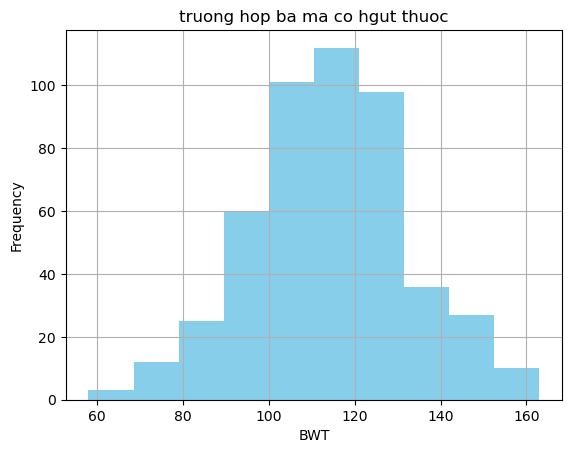

In [26]:
# bieu do Histogram trong truong hop ba ma co hgut thuoc
data_Smoke= data[data["smoke"]==1]
plt.hist(data_Smoke["bwt"], color='skyblue')
plt.title("truong hop ba ma co hgut thuoc")
plt.xlabel("BWT")
plt.ylabel("Frequency")
plt.grid()
plt.show()


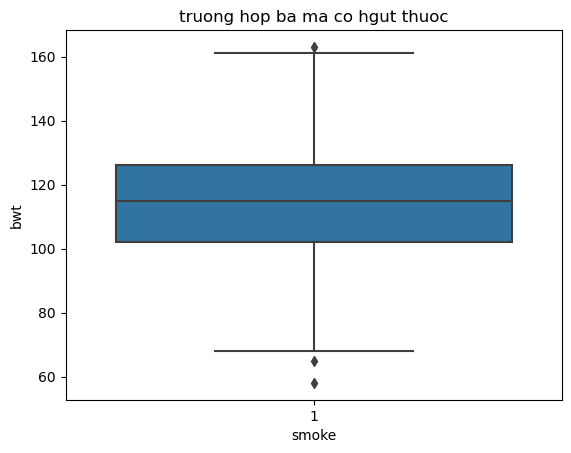

In [27]:
# bieu do boxplot trong truong hop ba ma co hgut thuoc
sns.boxplot(x="smoke", y="bwt", data=data_Smoke)
plt.title("truong hop ba ma co hgut thuoc")
plt.show()

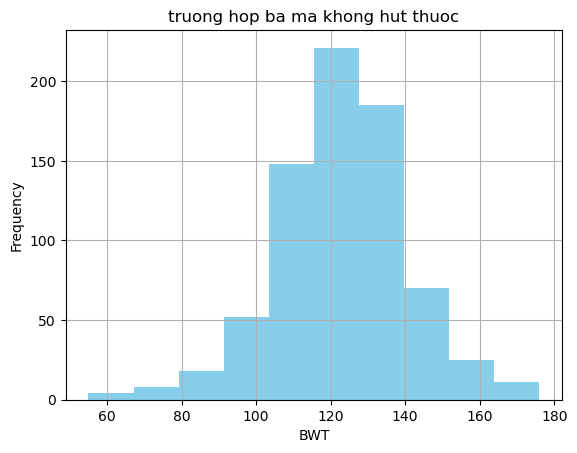

In [28]:
# bieu do Histogram trong truong hop ba ma khong hut thuoc
data_NSmoke= data[data["smoke"]==0]
plt.hist(data_NSmoke["bwt"], color='skyblue')
plt.title("truong hop ba ma khong hut thuoc")
plt.xlabel("BWT")
plt.ylabel("Frequency")
plt.grid()
plt.show()

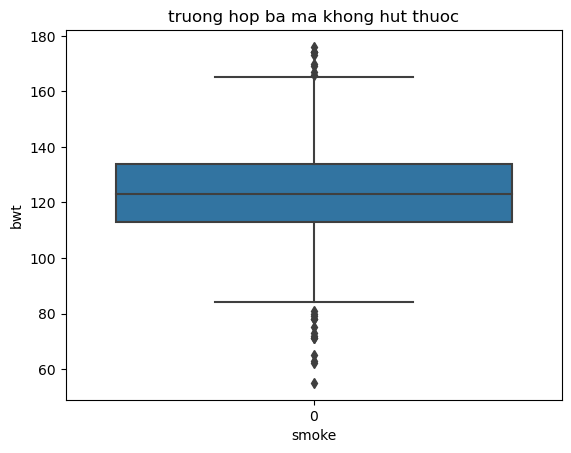

In [29]:
# bieu do boxplot trong truong hop ba ma khong hgut thuoc
sns.boxplot(x="smoke", y="bwt", data=data_NSmoke)
plt.title("truong hop ba ma khong hut thuoc")
plt.show()

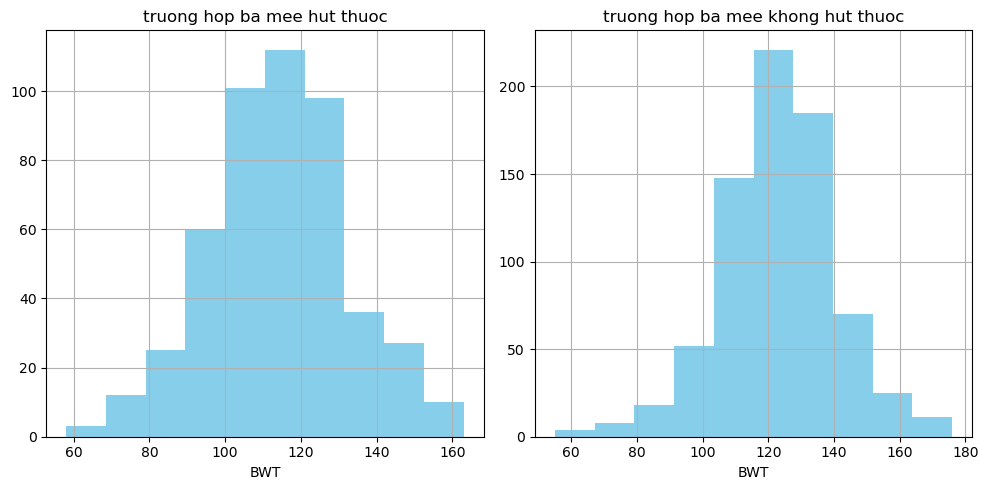

In [30]:
# loc du lieu trong truong hop ba ma khong hut thuoc
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data_Smoke["bwt"], color='skyblue')
plt.title('truong hop ba mee hut thuoc')
plt.xlabel("BWT")
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(data_NSmoke["bwt"],color='skyblue')
plt.title('truong hop ba mee khong hut thuoc')
plt.xlabel("BWT")
plt.tight_layout()
plt.grid()
plt.show()

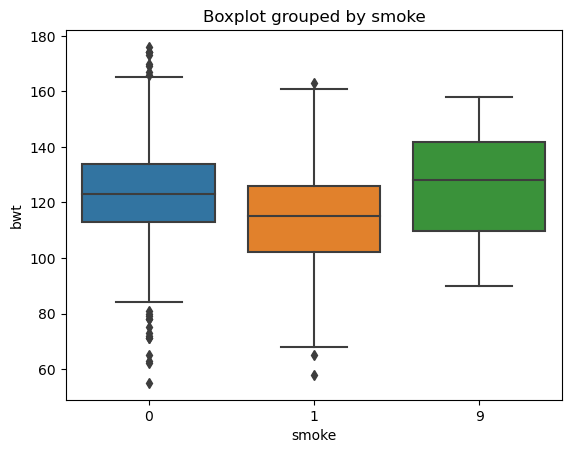

In [32]:
# bieu dien bieu do voi boxpplot voi du lieu la ba me hut thuoc
#dữ liệu phân bố tập trung ở 102 đến 128, có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) 

#biểu diễn bằng biểu đồ boxplot với dữ liệu là các bà mẹ không hút thuốc,dữ liệu phân bố tập trung ở 118 đến 130, có nhiều giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 78) 

#đối với các dữ liệu còn lại thì phân bố tập trung ở 110 đến 14,#không có giá trị ngoại lệ
sns.boxplot(x="smoke", y="bwt", data=data)
plt.title("Boxplot grouped by smoke")
plt.show()

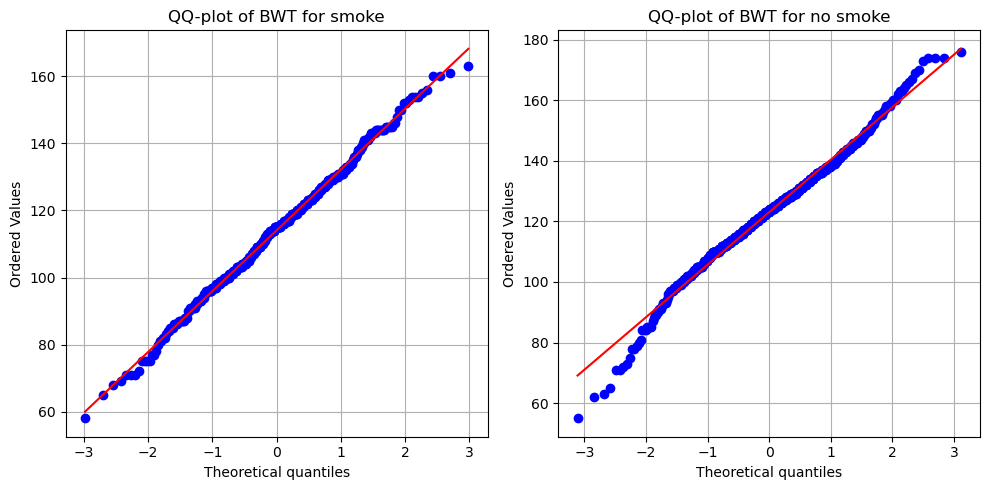

In [33]:
#bieu do QQ-lot bieu dien du lieu ba me hyt thuo va ba me khong hut thuoc
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(data_Smoke["bwt"], dist="norm", plot=plt)
plt.title('QQ-plot of BWT for smoke')
plt.grid(True)

plt.subplot(1, 2, 2)
stats.probplot(data_NSmoke["bwt"], dist="norm", plot=plt)
plt.title('QQ-plot of BWT for no smoke')

plt.grid(True)
plt.tight_layout()
plt.show()